# Handwritten Digit Recognition with Pytorch

In this project I'll create a beginner-level application using Python framework - Pytorch. As well as matplotlib and Numpy.

In [81]:
# import libraries

from torchvision import datasets
from torchvision.transforms import ToTensor

In [82]:
train_data = datasets.MNIST(
    root = 'data', # specify the directory for downloading dataset
    train = True, # specify that set we're trying to download is "train"
    transform = ToTensor(), # transform images to N-dimentional matrixes(Tensors)
    download = True # we download set and don't use local directory
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

## EDA

In [83]:
train_data # general dataset info

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [84]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [85]:
train_data.data.shape # shape of data

torch.Size([60000, 28, 28])

In [86]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [87]:
train_data.targets.shape # size of lables of digits

torch.Size([60000])

In [88]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [89]:
from torch.utils.data import DataLoader #dataloader will help us create train and test sets

loaders = {
    'train': DataLoader(train_data, # create from train data
                        batch_size=100, # will consist of batches of 100 digits
                        shuffle=True, # we'll have digits randomly dstributed
                        num_workers=1), # only 1 digit per 

    'test': DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1)
}

In [90]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7ff1a20ab880>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7ff1a2204b50>}

## Creating Neural Network

In [91]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):  # Convolutional Neural Network
    def __init__(self):  # Create CNN architecture
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  # Add 1st convolutional layer to create depth of 10
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)  # Add 2nd convolutional layer to create depth of 20
        self.conv2_drop = nn.Dropout2d()  # Reduce overfitting by randomly setting some activations to zero
        self.fc1 = nn.Linear(320, 50)  # Flatten the feature map to a vector of 320 elements and then to 50 neurons
        self.fc2 = nn.Linear(50, 10)  # Fully connected layer reducing to 10 neurons (number of classes)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # Apply ReLU activation and max pooling to reduce dimensionality
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))  # Apply dropout, ReLU, and max pooling to reduce dimensionality further
        x = x.view(-1, 320)  # Flatten the feature map to a vector of size 320
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the fully connected layer
        x = F.dropout(x, training=self.training)  # Apply dropout only during training to reduce overfitting
        x = self.fc2(x)  # Output layer with 10 neurons (one for each class)

        return F.softmax(x, dim=1)  # Apply softmax activation to get class probabilities

In [92]:
import torch

optimizer = optim.Adam(model.parameters(), lr=0.001)  # Create an Adam optimizer with a learning rate of 0.001

loss_fn = nn.CrossEntropyLoss()  # Define the loss function as CrossEntropyLoss, suitable for classification

def train(epoch):  # Define the training function, which takes the epoch number as an argument
    model.train()  # Set the model to training mode
    for batch_idx, (data, target) in enumerate(loaders['train']):  # Iterate over batches of data from the training loader
        optimizer.zero_grad()  # Reset the gradients of all model parameters
        output = model(data)  # Forward pass: compute the model output
        loss = loss_fn(output, target)  # Compute the loss between the model output and the target labels
        loss.backward()  # Backward pass: compute the gradients of the loss w.r.t. model parameters
        optimizer.step()  # Update model parameters using the optimizer
        if batch_idx % 20 == 0:
            print(f"Epoch: {epoch}, Progress: {batch_idx * len(data)} / {len(loaders['train'].dataset)}, Loss: {loss.item():.6f}")

In [94]:
def test():
    model.eval()  # Set model to evaluation mode

    test_loss = 0  # Initialize test loss
    correct = 0    # Initialize correct predictions

    with torch.no_grad():  # Disable gradient calculations
        for data, target in loaders['test']:  # Iterate through test data
            output = model(data)  # Get model predictions
            test_loss += loss_fn(output, target).item()  # Accumulate loss
            pred = output.argmax(dim=1, keepdim=True)  # Get predicted class
            correct += pred.eq(target.view_as(pred)).sum().item()  # Count correct predictions

    test_loss /= len(loaders['test'].dataset)  # Average test loss
    print(f"\nLoss: {test_loss:.4f}, Accuracy: {100. * correct / len(loaders['test'].dataset):.4f}%")

## Training Neural Network

In [95]:
for epoch in range(1, 11):
    train(epoch)
    test()

Epoch: 1, Progress: 0 / 60000, Loss: 2.303767
Epoch: 1, Progress: 2000 / 60000, Loss: 2.290027
Epoch: 1, Progress: 4000 / 60000, Loss: 2.159450
Epoch: 1, Progress: 6000 / 60000, Loss: 2.016214
Epoch: 1, Progress: 8000 / 60000, Loss: 1.904445
Epoch: 1, Progress: 10000 / 60000, Loss: 1.773231
Epoch: 1, Progress: 12000 / 60000, Loss: 1.887738
Epoch: 1, Progress: 14000 / 60000, Loss: 1.751299
Epoch: 1, Progress: 16000 / 60000, Loss: 1.788006
Epoch: 1, Progress: 18000 / 60000, Loss: 1.807648
Epoch: 1, Progress: 20000 / 60000, Loss: 1.785443
Epoch: 1, Progress: 22000 / 60000, Loss: 1.773785
Epoch: 1, Progress: 24000 / 60000, Loss: 1.807131
Epoch: 1, Progress: 26000 / 60000, Loss: 1.734413
Epoch: 1, Progress: 28000 / 60000, Loss: 1.645554
Epoch: 1, Progress: 30000 / 60000, Loss: 1.753033
Epoch: 1, Progress: 32000 / 60000, Loss: 1.724449
Epoch: 1, Progress: 34000 / 60000, Loss: 1.665481
Epoch: 1, Progress: 36000 / 60000, Loss: 1.794372
Epoch: 1, Progress: 38000 / 60000, Loss: 1.666678
Epoch: 1

### We managed to get 97% accuracy of model.

## Model Visualisation

Prediction: 1


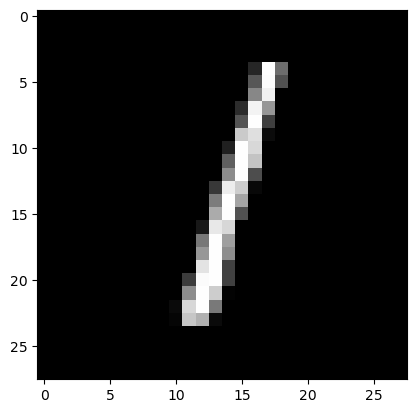

In [96]:
import matplotlib.pyplot as plt

model.eval() # set model to evaluation mode

data, target = test_data[2] # get data and label of test data digit in position 0

data = data.unsqueeze(0) # add dimension to the image (1, 1, 28, 28)

output = model(data) # calculate prediction

prediction = output.argmax(dim=1, keepdim=True).item() # from prediction extract only label of digit

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).numpy() # Remove batch and channel dimensions, convert to numpy array -> (28, 28)

plt.imshow(image, cmap='gray')
plt.show()

## Custom Digits Recognition

I'll send over a hand-written digits create by me in the "Paint" program.

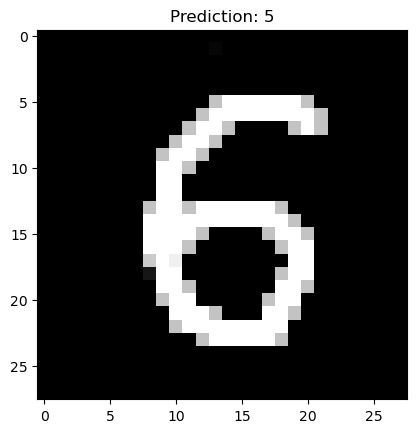

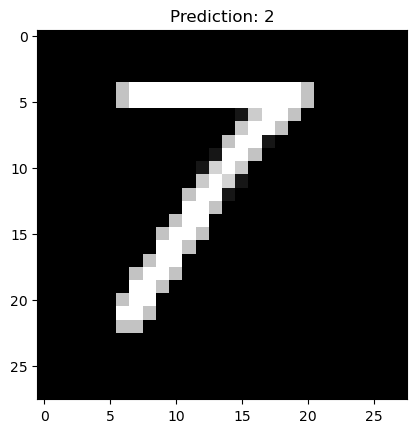

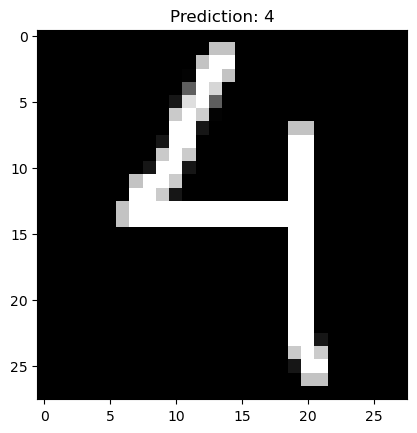

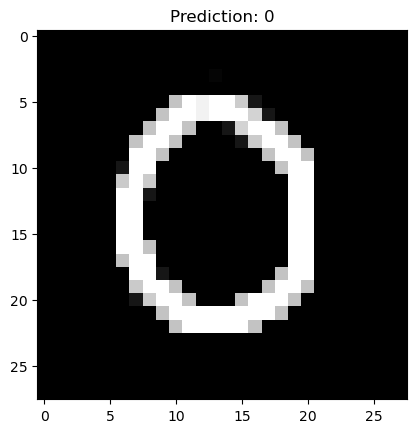

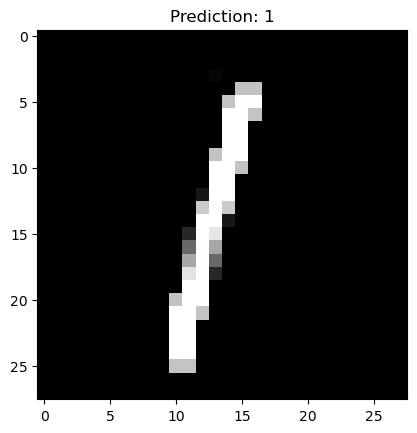

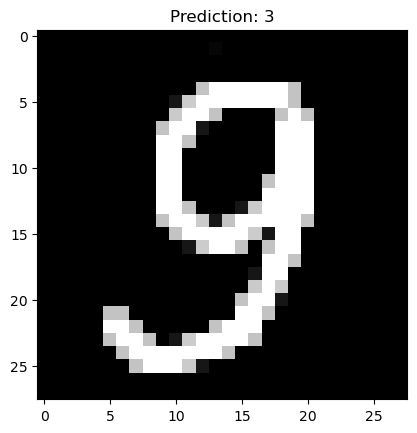

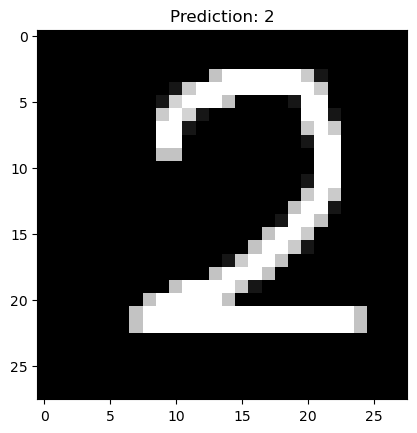

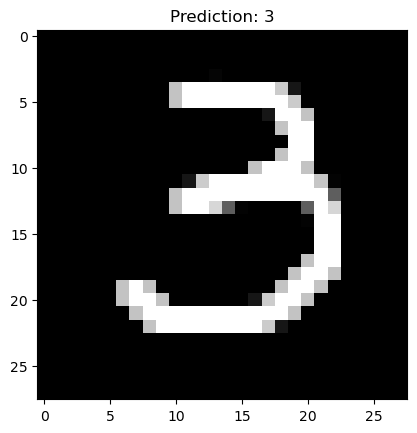

In [98]:
from PIL import Image
from torchvision import transforms
import os

images_path = './data/hand-written/'
images = []

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


for filename in os.listdir(images_path):
    if filename.endswith('.png'):

        image_path = os.path.join(images_path, filename)
        image = Image.open(image_path).convert('L') 
        
        image_tensor = transform(image)
        
        image_tensor = image_tensor.unsqueeze(0)
        
        images.append((filename, image_tensor, image))

for filename, image_tensor, original_image in images:
    with torch.no_grad(): 
        output = model(image_tensor)
    
    prediction = output.argmax(dim=1, keepdim=True).item()
    
    plt.imshow(original_image, cmap='gray')
    plt.title(f"Prediction: {prediction}")
    plt.show()

## Save model

In [100]:
torch.save(model.state_dict(), 'cnn_model.pth')